In [322]:
import dhlab as dh
import pandas as pd
import gender_guesser.detector as gg
import os

dh.css()

In [323]:
def check_heads(df, word = 'jeg', cols = ['head_lemma', 'head_head_lemma'], variants = True):
    """If variants then all printed versions capitalized and so on"""
    if variants:
        wordforms = [word, word.upper(), word.lower(), word.capitalize()]
        res = pd.DataFrame(pd.concat([df[df.token.isin(wordforms)].groupby(col).sum().sort_values(by='frekv', ascending=False) for col in cols], axis = 1).sum(axis = 1), columns = ['frekv'])
        #res.columns = ['frekv']

    else:
        res = df[df.token == word].groupby('head').sum().sort_values(by='frekv', ascending=False)
    return res

def describe_pos(df, features = ['PRON', 'PROPN']):
    sumpos = df.groupby('pos').sum()
    countpos = df.groupby('pos').count()[['token']]
    r = pd.concat([sumpos.loc[features], countpos.loc[features]], axis = 1)
    r.columns = ['sum', 'count']
    return r
    
def describe_ner(df, features = ['PER']):
    nersum = df.groupby('ner').sum()
    nercount = df.groupby('ner').count()['frekv']
    r = pd.concat([nersum.loc[features], nercount.loc[features]], axis = 1)
    r.columns = ['sum', 'count']
    return r

def pronouns(df):
    return df[df.pos == 'PRON'].groupby("lemma").sum().sort_values(by='frekv', ascending = False)

def propriums(df):
    props =  df[df.pos == 'PROPN'].groupby("token").sum().sort_values(by='frekv', ascending = False)
    #props['gender'] = [get_gender(x) for x in props.index]
    return props
    
def get_gender(name):
    return gg.Detector().get_gender(name)

# Hent filene

In [414]:
mappe = "parsed_files"
mfiles = !ls parsed_files
files = [os.path.join(mappe, fn) for fn in mfiles]

## Rekonstruer urnene

In [415]:
urns = [f"URN:NBN:no-nb_digibok_{f.split('_')[-1].split('.pqt')[0]}" for f in files]

In [416]:
corpus = dh.Corpus()
corpus.extend_from_identifiers(urns)
corpus = corpus.frame[['dhlabid', 'urn','authors', 'title', 'year', 'langs', 'publisher','subjects','ddc','genres']]

In [417]:
corpus[corpus.authors.str.contains('Solstad')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres
17,100012888.0,URN:NBN:no-nb_digibok_2010082403062,"Solstad , Dag","Arild Asnes, 1970 : roman",1996.0,nob,Bokklubben nye bøker,,839.823,novel
19,100042200.0,URN:NBN:no-nb_digibok_2011030820008,"Solstad , Dag",Gymnaslærer Pedersens beretning om den store p...,1992.0,nob,Oktober,,839.823,novel
20,100499333.0,URN:NBN:no-nb_digibok_2011050920007,"Solstad , Dag",Spiraler : noveller,2001.0,nob,Oktober,,839.823,short story
21,100499351.0,URN:NBN:no-nb_digibok_2011051020013,"Solstad , Dag",Svingstol : en samling prosatekster,1967.0,nob,Aschehoug,skjønnlitteratur/voksen / norsk / prosa / 1960...,839.93,short story
41,100217326.0,URN:NBN:no-nb_digibok_2014072908100,"Solstad , Dag",Krig 1940 : roman,2001.0,nob,Oktober,,839.823,novel


In [418]:
corpus[corpus.urn.str.contains('2015050648108')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres


In [419]:
parses = {f:pd.read_parquet(f) for f in files}

In [420]:
def dtm(word):
    alldata = []
    for p in parses:
        han = check_heads(parses[p], word).head(20)
        auth = f"{p.split('/')[-1].split('_')[0]}"
        urnseries = f"{p.split('.pqt')[0].split('_')[-1]}"
        
        han.columns = [f"{auth}-{word}-{urnseries}"]
        alldata.append(han)
    dtm = pd.concat(alldata,axis = 1).fillna(0)
    return dtm

In [421]:
df = parses[files[10]]
df = df[df.pos == 'PROPN']
print(df["token dep head head_pos".split()].sample(10).style.hide().to_latex().replace('_','\_'))

\begin{tabular}{llll}
token & dep & head & head\_pos \\
Welland & flat:name & fru & PROPN \\
Beg & obj & tenkte & VERB \\
herr & cop & Å & INTJ \\
Fru & nsubj & kunnet & VERB \\
Snill & nsubj & irriterte & VERB \\
Beire & flat:name & Bkal & PROPN \\
enneB & ROOT & enneB & PROPN \\
Tordis & nsubj & forekom & VERB \\
na & advmod & truet & VERB \\
BkapBrnann & nmod & annet & DET \\
\end{tabular}



In [422]:
han_dtm =dtm('han')/dtm('han').sum()

In [423]:
hun_dtm = dtm('hun')/dtm('hun').sum()

In [424]:
han_dot = han_dtm.transpose().dot(han_dtm)

In [425]:
hun_dot = hun_dtm.transpose().dot(hun_dtm)

In [426]:
corpus[corpus.authors.str.contains('Uri')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres
12,100151554.0,URN:NBN:no-nb_digibok_2009042004109,"Uri , Helene",Dyp rød 315 : roman,2002.0,nob,Gyldendal,norske / romaner / 2000-tallet,839.823,fiction
25,100060316.0,URN:NBN:no-nb_digibok_2011101408121,"Uri , Helene",De beste blant oss : roman,2006.0,nob,Gyldendal,Linguistics / Faculty / Universities / Literat...,839.823,novel
40,100211089.0,URN:NBN:no-nb_digibok_2014061706080,"Uri , Helene",Kjerringer : roman,2011.0,nob,Gyldendal,norsk / litteratur / norske / romaner / 2010-t...,839.823,novel
48,100376882.0,URN:NBN:no-nb_digibok_2018072748088,"Uri , Helene",Rydde ut : roman,2014.0,nob,Gyldendal,,839.823,novel
57,100581430.0,URN:NBN:no-nb_digibok_2021092148045,"Uri , Helene",Hålke : roman,2017.0,nob,Gyldendal,Ekteskap og parforhold / Ekteskap og parforhol...,839.823,novel / text


In [431]:
corpus[corpus.authors.str.contains('Knaus')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres
37,100188152.0,URN:NBN:no-nb_digibok_2014013105041,"Knausgård , Karl Ove",Min kamp : roman : Tredje bok,2009.0,nob,Oktober,Fictional Works / norske / romaner / 1970-tall...,839.823 / 839.82,biography / novel
39,100197175.0,URN:NBN:no-nb_digibok_2014032405041,"Knausgård , Karl Ove",Min kamp : roman : [Første bok],2009.0,nob,Oktober,Fictional Works / norske / romaner / skjønnlit...,839.823 / 839.82,biography / novel
53,100428991.0,URN:NBN:no-nb_digibok_2020112407560,"Knausgård , Karl Ove",En tid for alt,2012.0,nob,Oktober,,839.82 / 839.823,novel
58,100604745.0,URN:NBN:no-nb_digibok_2021121448501,"Knausgård , Karl Ove",Om våren,2020.0,nob,Forlaget Oktober,Familie / Familie,839.8238,novel / tekst


In [435]:
corpus[corpus.authors.str.contains('Hamsun')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres
11,100031870.0,URN:NBN:no-nb_digibok_2009031004082,"Hamsun , Knut",Markens grøde,1999.0,nob,Gyldendal,,839.823,fiction
18,100040955.0,URN:NBN:no-nb_digibok_2011022205198,"Hamsun , Knut",Det vilde kor : digte,1968.0,nob,Bokklubben,Dikt / Litteratur / Norsk litteratur / skjønnl...,839.82 / S 839.91,
32,100130846.0,URN:NBN:no-nb_digibok_2013012306172,"Hamsun , Knut",Victoria,2009.0,nob,Gyldendal,,839.823 / 839.82,novel
45,100345759.0,URN:NBN:no-nb_digibok_2017072407123,"Hamsun , Knut",Pan,1967.0,nob,Gyldendal,skjønnlitteratur/voksen,839.82,
46,100366912.0,URN:NBN:no-nb_digibok_2018031248041,"Hamsun , Knut",August : roman. 2,1930.0,nob,Gyldendal,,839.82,


In [444]:
hun_dot['Uri-hun-2011101408121'].sort_values(ascending=False).head(5)

Knausgård-hun-2014032405041    0.088451
Knausgård-hun-2014013105041    0.083447
Mykle-hun-2008090400019        0.083232
Uri-hun-2011101408121          0.082235
Hamsun-hun-2009031004082       0.082159
Name: Uri-hun-2011101408121, dtype: float64

In [429]:
han_dot['Uri-han-2011101408121'].sort_values(ascending=False).head(5)

Uri-han-2011101408121          0.069060
Knausgård-han-2014032405041    0.064396
Lindell-han-2011111705054      0.064314
Mykle-han-2008090400019        0.064237
Knausgård-han-2014013105041    0.063831
Name: Uri-han-2011101408121, dtype: float64

In [432]:
hun_dot['Uri-hun-2014061706080'].sort_values(ascending=False).head(5)

Mykle-hun-2008090400019        0.073994
Uri-hun-2014061706080          0.073201
Knausgård-hun-2014032405041    0.072815
Hamsun-hun-2009031004082       0.072758
Uri-hun-2011101408121          0.071319
Name: Uri-hun-2014061706080, dtype: float64

In [439]:
han_dot['Uri-han-2014061706080'].sort_values(ascending=False).head(5)

Knausgård-han-2014013105041    0.074758
Knausgård-han-2014032405041    0.073630
Uri-han-2014061706080          0.071047
Hamsun-han-2009031004082       0.070484
Knausgård-han-2021121448501    0.070226
Name: Uri-han-2014061706080, dtype: float64

In [436]:
han_dot['Knausgård-han-2014013105041'].sort_values(ascending=False).head(5)

Knausgård-han-2014013105041    0.152630
Knausgård-han-2021121448501    0.132938
Knausgård-han-2014032405041    0.129619
Ragde-han-2013121108104        0.120760
Mykle-han-2008072800017        0.108248
Name: Knausgård-han-2014013105041, dtype: float64

In [441]:
hun_dot['Knausgård-hun-2014013105041'].sort_values(ascending=False).head(5)

Knausgård-hun-2014032405041    0.135003
Knausgård-hun-2014013105041    0.130256
Knausgård-hun-2021121448501    0.106490
Mykle-hun-2008090400019        0.102363
Hoel-hun-2010061223001         0.098163
Name: Knausgård-hun-2014013105041, dtype: float64

In [442]:
hun_dot['Lindell-hun-2013041206120'].sort_values(ascending=False).head(5)

Knausgård-hun-2014032405041    0.088324
Knausgård-hun-2014013105041    0.082020
Mykle-hun-2008090400019        0.078456
Lindell-hun-2013041206120      0.077450
Lindell-hun-2020083107626      0.075639
Name: Lindell-hun-2013041206120, dtype: float64

<AxesSubplot: >

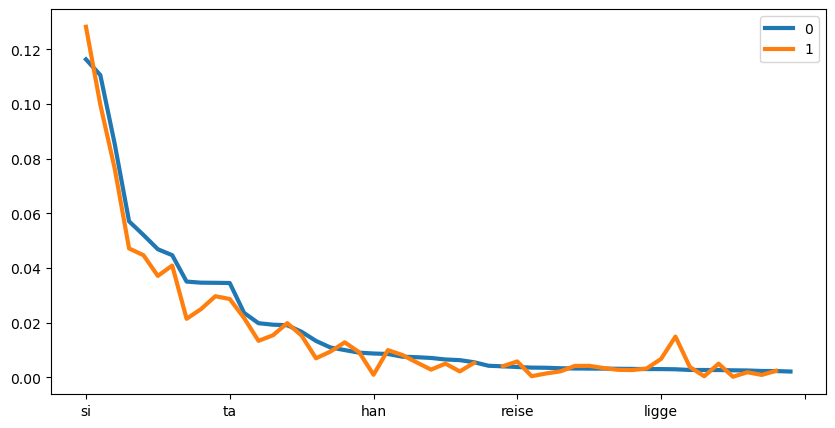

In [368]:
pd.concat([han_dtm.mean(axis=1), hun_dtm.mean(axis=1)], axis = 1).sort_values(by=0, ascending=False).head(50).plot(figsize=(10,5), lw=3)#.style.background_gradient()

In [375]:
comp = pd.concat([han_dtm.mean(axis=1), hun_dtm.mean(axis=1)], axis = 1)

In [377]:
comp['diff'] = comp[0]/comp[1]

In [381]:
comp.sort_values(by='diff').head(50)

,0,1,diff
hun,0.000335,0.007543,0.044373
le,0.000802,0.012467,0.064349
oppdage,0.000244,0.002721,0.089625
lære,0.000503,0.005434,0.092551
smile,0.002989,0.014944,0.200016
beskrive,0.000586,0.002424,0.241632
vise,0.000619,0.002483,0.249486
sove,0.000574,0.002114,0.271368
så,0.001781,0.005638,0.315916
pleie,0.000449,0.001354,0.331849


In [385]:
corpus[corpus.authors.str.contains('Mykle')]

,dhlabid,urn,authors,title,year,langs,publisher,subjects,ddc,genres
1,100559038.0,URN:NBN:no-nb_digibok_2008033104009,"Mykle , Agnar",Rubicon,1996.0,nob,Gyldendal,,839.823,fiction
17,100553776.0,URN:NBN:no-nb_digibok_2011111608114,"Mykle , Agnar","Tyven, tyven skal du hete : roman",1951.0,nob,Tiden,,,
25,100171174.0,URN:NBN:no-nb_digibok_2013092407023,"Mykle , Agnar",Lasso rundt fru Luna : roman,1966.0,nob,Gyldendal,,839.93,fiction
28,100204064.0,URN:NBN:no-nb_digibok_2014051408203,"Mykle , Agnar",Lasso rundt fru Luna,1996.0,nob,Den norske bokklubben,,839.823,fiction
47,100587449.0,URN:NBN:no-nb_digibok_2021050448585,"Mykle , Agnar",Sangen om den røde rubin : roman,1975.0,nob,Bokklubben,,839.823 / 839.93,fiction


In [386]:
afile = "parsed_files/Mykle_no-nb_digibok_2021050448585.pqt"

In [387]:
mk = parses[afile]

In [445]:
propriums(mk).head(5)

,frekv
token,
Ask,874
Daniel,121
Embla,90
Gud,89
Constance,74


In [570]:
prot(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"],1)

'Pål'

In [569]:
def prot(book, n):
    return propriums(book).reset_index().iloc[n-1].token
    

In [581]:
def char_subjects(pars, char):
    heads = pars[(pars.token == char) & (pars.head_pos=='VERB')&(pars.dep=='nsubj')].groupby(['head_lemma']).sum().sort_values(by='frekv', ascending=False)
    headds = pars[(pars.token == char) & (pars.head_pos=='AUX')&(pars.dep=='nsubj')].groupby(['head_head_lemma']).sum().sort_values(by='frekv', ascending=False)
    return pd.DataFrame(pd.concat([heads, headds], axis = 1).sum(axis=1),columns=["frekv"]).sort_values(by='frekv', ascending=False)

In [594]:
def char_head(pars, char):
    head = pars[(pars.head == char) & ((pars.pos == 'ADJ')|(pars.pos == 'NOUN'))].groupby("lemma").sum()
    headd = pars[(pars.head_head == char) & ((pars.head_pos == 'ADJ')|(pars.head_pos == 'NOUN'))].groupby('head_lemma').sum()
    return pd.DataFrame(pd.concat([head, headd], axis = 1).sum(axis=1),columns=["frekv"]).sort_values(by='frekv', ascending=False)

In [499]:
#mk.groupby('dep').sum().sort_values(by='frekv', ascending=False)

In [520]:
mk[(mk.head_pos == 'NOUN') & ((mk.lemma=='Ask'))].groupby("lemma").sum().sort_values(by='frekv', ascending=False)

,frekv
lemma,
Ask,84


In [535]:
mk[mk.lemma == 'skrive'].groupby('token').sum().sort_values(by='frekv', ascending=False).head(30)

,frekv
token,
skrive,25
skrevet,24
skrev,16
skriver,11
Skrive,1


In [540]:
char_subjects(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"], "de").head(10)

,frekv
ha,28.0
komme,15.0
se,13.0
snakke,12.0
gjøre,9.0
bli,9.0
begynne,8.0
gå,8.0
få,6.0
stå,6.0


In [598]:
char_head(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"], "håret").head(10)

,frekv
øye,6.0
hår,5.0
øy,5.0
håndledd,4.0
kreativitet,3.0
nyanse,3.0
eim,3.0
skulder,2.0
småkrøll,2.0
smilehull,2.0


In [590]:
char_head(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"], "de").head(20)

,frekv
kontor,8.0
ansatt,4.0
Ytterst,4.0
sigende,4.0
mellomnivå,3.0
stipendiat,3.0
eksamen,3.0
legning,3.0
likhet,3.0
litt,3.0


In [522]:
char_subjects(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"], "Pål").head(10)

,frekv
si,106.0
se,34.0
ha,27.0
svare,24.0
tenke,22.0
spørre,21.0
vite,19.0
komme,15.0
begynne,13.0
få,11.0


In [575]:
char_subjects(parses["parsed_files/Ragde_no-nb_digibok_2011062705031.pqt"], 'jeg').head(10)

,frekv
vite,17.0
ha,13.0
gjøre,12.0
tro,10.0
se,9.0
si,7.0
komme,6.0
få,6.0
mene,6.0
finne,6.0


In [580]:
parses["parsed_files/Ragde_no-nb_digibok_2011062705031.pqt"]['frekv'].sum()

41328

In [580]:
prot
parses["parsed_files/Ragde_no-nb_digibok_2011062705031.pqt"]

41328

In [576]:
propriums(parses["parsed_files/Ragde_no-nb_digibok_2011062705031.pqt"]).head(10)

,frekv
token,
Dem,41
Madsen,39
herr,37
Lyder,33
Sonja,12
Seiv,11
Eva,9
Revehiet,9
Zellweger,8


In [486]:
char_subjects(parses["parsed_files/Uri_no-nb_digibok_2011101408121.pqt"], "Nanna").head(20)

,frekv
si,55.0
ha,20.0
spørre,12.0
svare,12.0
se,11.0
sitte,8.0
nikke,7.0
komme,6.0
ta,5.0
le,5.0


In [485]:
char_subjects(parses["parsed_files/Hamsun_no-nb_digibok_2009031004082.pqt"], "Isak").head(20)

,frekv
si,94.0
spørre,40.0
ha,32.0
svare,32.0
komme,16.0
begynde,10.0
se,8.0
forstå,8.0
gjøre,7.0
tænke,6.0


In [493]:
char_subjects(parses["parsed_files/Hamsun_no-nb_digibok_2009031004082.pqt"], "hun").head(20)

,frekv
ha,164.0
si,131.0
komme,62.0
svare,44.0
spørre,38.0
gjøre,25.0
gik,24.0
stå,18.0
høre,18.0
fik,18.0


In [484]:
char_subjects(mk, "Ask").head(20)

,frekv
si,65.0
tenke,34.0
se,29.0
føle,29.0
vite,27.0
få,24.0
ha,18.0
bli,18.0
komme,14.0
gå,12.0


In [412]:
dh.Concordance([corpus.loc[47].urn], "NEAR(Ask student, 15)").show(20)

,link,concordance
14,URN:NBN:no-nb_digibok_2021050448585,"... Forbløffet snudde Ask seg og så på den fremmede student han satt ved siden av , en høy blond ,..."
1,URN:NBN:no-nb_digibok_2021050448585,... Og den unge student Ask Burlefot hadde fått en demonstrasjon av ordets makt som han aldri glemte .
8,URN:NBN:no-nb_digibok_2021050448585,"... der har De anskaffet Dem en søt og pen pike , kjære student , hold fast ved henne . Ask..."
9,URN:NBN:no-nb_digibok_2021050448585,"... ( atter blunket han henrykt til Ask , og atter rødmet den unge student ) , han hadde hver dag..."
5,URN:NBN:no-nb_digibok_2021050448585,"... rødkinnete , barmfulle , og tønnelignende kvinner Ask hadde sett . Men student Floden elsket henne hengivent og full av..."
6,URN:NBN:no-nb_digibok_2021050448585,"... Eirik Floden holdt raskt og smilende et lite foredrag om Den Økonomiske , og om den nyankomne student Ask Burlefot..."
0,URN:NBN:no-nb_digibok_2021050448585,"Allerede når man la sammen de to ting , at den unge student - hvis navn var Ask Burlefot -..."
2,URN:NBN:no-nb_digibok_2021050448585,"... Hans navn er Ask Burlefot , student ved Den Økonomiske ; jeg er hans venn og kan gå god for..."
7,URN:NBN:no-nb_digibok_2021050448585,"... opp for Ask , at det fantes mennesker - tilmed forbløffende mange mennesker - som anså en student som et..."
3,URN:NBN:no-nb_digibok_2021050448585,... lystige student . Det var et par menn i selskapet han intuitivt mislikte og derfor unngikk ; Ask hadde denne...


In [149]:
check_heads(parses[afile], "Ask").head(20)

,frekv
si,53.0
se,43.0
tenke,30.0
føle,33.0
ha,35.0
bli,31.0
få,15.0
svelgte,18.0
vite,23.0
Ask,21.0


In [133]:
check_heads(parses[afile], "han", cols=['head_lemma', 'head_head_lemma']).head(50)

,frekv
si,80.0
ha,32.0
se,24.0
komme,15.0
høre,19.0
gjøre,15.0
dra,11.0
spørre,14.0
holde,11.0
tenke,9.0


In [235]:
soil = dh.Corpus(author="Hamsun", title = "Markens", limit = 5)

In [247]:
print(soil.frame['dhlabid title authors year'.split()].style.hide().to_latex())

\begin{tabular}{rllr}
dhlabid & title & authors & year \\
100447029 & Markens grøde & Hamsun , Knut / Harr , Karl Erik & 2002 \\
100393965 & Markens grøde - Revisited : av Knut Hamsun & Hamsun , Knut & 2016 \\
100371490 & Markens grøde & Hartmann , Sebastian / Hamsun , Knut / Tørressen , Hege Randi & 2006 \\
100198378 & Markens Grøde. 2 & Hamsun , Knut & 1917 \\
100586277 & Markens grøde & Hamsun , Knut & 2009 \\
\end{tabular}



In [254]:
soil.frame.dhlabid[1]

100393965

In [ ]:
URN:NBN:no-nb_digibok_2012103108074

In [281]:
names = dh.NER("URN:NBN:no-nb_digibok_2012103108074", model = 'nb_core_news_lg',start_page=0, to_page=500)

In [282]:
characters = names.ner[names.ner.ner=='PER'].sort_values(by='frekv', ascending=False)

In [286]:
print(characters.head(8).style.hide().to_latex())

\begin{tabular}{llr}
token & ner & frekv \\
Isak & PER & 734 \\
Inger & PER & 526 \\
Eleseus & PER & 300 \\
Oline & PER & 272 \\
Aksel & PER & 250 \\
Sivert & PER & 250 \\
Barbro & PER & 234 \\
Brede & PER & 160 \\
\end{tabular}



In [284]:
characters

,token,ner,frekv
203,Isak,PER,734
185,Inger,PER,526
100,Eleseus,PER,300
305,Oline,PER,272
9,Aksel,PER,250
...,...,...,...
619,sildstim,PER,1
652,tåleiia,PER,1
520,indtar,PER,1
522,istad,PER,1


In [280]:
dh.Concordance([soil.frame.urn[3]], "heyerdahl").show()

,link,concordance
8,URN:NBN:no-nb_digibok_2014031208133,"... I Begyndelsen gik det rigtig godt , Fru Heyerdahl var saa omhyggelig for hende og gav hende Forklær og staset..."
2,URN:NBN:no-nb_digibok_2014031208133,"... , men Lagmanden var ikke uenig med Fru Lensmand Heyerdahl , langtfra , han var saa human han ogsaa ,..."
4,URN:NBN:no-nb_digibok_2014031208133,"... I Granden hadde denne Fru Lensmand Heyerdahl kommet ham i Forkjøpet og knepet adskillige Argumenter fra ham i Formiddag ,..."
1,URN:NBN:no-nb_digibok_2014031208133,... Fru Lensmand Heyerdahl var i Bevægelse .
5,URN:NBN:no-nb_digibok_2014031208133,"... Vi har idag hørt den Mening som hendes Matmor , Fru Heyerdahl , hadde om hende , den kunde ikke..."
7,URN:NBN:no-nb_digibok_2014031208133,Fru Lensmand Heyerdahl holdt Ord : hun hadde tat Barbro til sig . Ogsaa ombord i Skibet tok hun sig...
3,URN:NBN:no-nb_digibok_2014031208133,"... De fleste av Dokumenterne var i Geisslers Øine noget Skrap , denne Lensmand Heyerdahl var et meget indskrænket Menneske ,..."
0,URN:NBN:no-nb_digibok_2014031208133,"... , jeg har tjent hos ham , ho Fru Heyerdahl vil hjælpe mig . Det er ikke alle som har..."
9,URN:NBN:no-nb_digibok_2014031208133,... Men saa blev Fru Heyerdahl endda mere omhyggelig og da Julemoroerne begyndte blev Fru Heyerdahl stræng . Hvad skulde nu...
6,URN:NBN:no-nb_digibok_2014031208133,... Fru Lensmand Heyerdahl hadde ut fra sit langvarige Kjendskap til Barbro og efter sin rike Erfaring som Mor slaat sit...


In [290]:
parse = dh.POS(urn = "URN:NBN:no-nb_digibok_2012103108074", start_page=0, to_page=500).pos

In [312]:
(ex:=parse[((parse.token=='Isak')|(parse.token=='Inger')) & (parse.head_pos == 'VERB')].sample(20))

,token,lemma,pos,dep,head,head_lemma,head_pos,head_head,head_head_lemma,head_head_pos,frekv
22904,Inger,Inger,NOUN,nsubj,står,stå,VERB,så,så,ADV,1
23152,Inger,Inger,PROPN,nsubj,gjorde,gjøre,VERB,gjorde,gjøre,VERB,1
23171,Inger,Inger,PROPN,nsubj,sa,si,VERB,så,se,VERB,1
24009,Isak,Isak,PROPN,nsubj,steg,stige,VERB,steg,stige,VERB,1
23956,Isak,Isak,PROPN,nsubj,svarte,svare,VERB,gik,gik,VERB,1
23688,Isak,Isak,PROPN,nsubj,har,ha,VERB,sat,sat,VERB,1
23915,Isak,Isak,PROPN,nsubj,svarte,svare,VERB,Ja,ja,INTJ,1
23197,Inger,Inger,PROPN,nsubj,sier,si,VERB,sier,si,VERB,1
23419,Inger,Inger,VERB,ROOT,Inger,Inger,VERB,Inger,Inger,VERB,1
23632,Isak,Isak,PROPN,nsubj,sa,si,VERB,Ser,se,VERB,1


In [320]:
print(ex["token dep head".split()].head(7).style.hide().to_latex())

\begin{tabular}{lll}
token & dep & head \\
Inger & nsubj & står \\
Inger & nsubj & gjorde \\
Inger & nsubj & sa \\
Isak & nsubj & steg \\
Isak & nsubj & svarte \\
Isak & nsubj & har \\
Isak & nsubj & svarte \\
\end{tabular}



In [315]:
(ggs := pd.DataFrame([(x,get_gender(x)) for x in characters.token[:8]], columns=['token','gender']))

,token,gender
0,Isak,male
1,Inger,female
2,Eleseus,unknown
3,Oline,female
4,Aksel,male
5,Sivert,male
6,Barbro,female
7,Brede,unknown


In [318]:
print(ggs.style.hide().to_latex())

\begin{tabular}{ll}
token & gender \\
Isak & male \\
Inger & female \\
Eleseus & unknown \\
Oline & female \\
Aksel & male \\
Sivert & male \\
Barbro & female \\
Brede & unknown \\
\end{tabular}

